In [24]:
# # !pip install seaborn
# # !pip install scipy
# # !pip install ipywidgets
# !pip install torch

In [25]:

import numpy as np
from glicko2 import load_data
import seaborn as sns
import pandas as pd
import torch
from competition_utils import bot_list

In [26]:
data = load_data()
print((data))
index = ["" for _ in bot_list]
new_ratings = [0 for _ in bot_list]
indices = []
ind_to_bot = {}
for b in bot_list:
    # print(data[entry]["index"])
    indices.append(data[b]["index"])
    ind_to_bot[data[b]["index"]] = b
    index[data[b]["index"]] = (int(round(data[b]["full_rating"])), b)
    new_ratings[data[b]["index"]] = data[b]["full_rating"]
print(index)
# ratings = np.array([i[0] for i in index])
# ratings = ratings/(400 * np.log10(np.e)) - np.mean(ratings/(400 * np.log10(np.e))) + 1500
# index = [(int(round(r)),i[1]) for r,i in zip(ratings,index)]
# print(index)
print(len(index))

{'floyd_combined': {'p1_rating': 1500, 'p1_deviation': 350, 'p1_volatility': 0.06, 'p2_rating': 1500, 'p2_deviation': 350, 'p2_volatility': 0.06, 'full_rating': 1500, 'full_deviation': 350, 'full_volatility': 0.06, 'index': 0, 'total_games_played': 58, 'games_played': 181, 'p1_elo': -55.539681084354285, 'p2_elo': 1858.2019011895172, 'full_elo': 1620.9686234526673}, 'moves': {'p1_rating': 1500, 'p1_deviation': 350, 'p1_volatility': 0.06, 'p2_rating': 1500, 'p2_deviation': 350, 'p2_volatility': 0.06, 'full_rating': 1500, 'full_deviation': 350, 'full_volatility': 0.06, 'index': 1, 'total_games_played': 56, 'games_played': 182, 'p1_elo': 1062.2894228984496, 'p2_elo': 1454.2312015527166, 'full_elo': 1681.9638365474657}, 'floyd': {'p1_rating': 1500, 'p1_deviation': 350, 'p1_volatility': 0.06, 'p2_rating': 1500, 'p2_deviation': 350, 'p2_volatility': 0.06, 'full_rating': 1500, 'full_deviation': 350, 'full_volatility': 0.06, 'index': 2, 'total_games_played': 55, 'games_played': 181, 'p1_elo': -

In [27]:

wins1 = np.load("scores/wins1.npy")
bool_inds = [[True if i in indices else False for i in range(wins1.shape[0])],[True if i in indices else False for i in range(wins1.shape[1])]]
# print(bool_inds)
wins1 = wins1[bool_inds[0],:][:,bool_inds[1]]
draws1 = np.load("scores/draws1.npy")[bool_inds[0],:][:,bool_inds[1]]
losses1 = np.load("scores/losses1.npy")[bool_inds[0],:][:,bool_inds[1]]
wins2 = np.load("scores/wins2.npy")[bool_inds[0],:][:,bool_inds[1]]
draws2 = np.load("scores/draws2.npy")[bool_inds[0],:][:,bool_inds[1]]
losses2 = np.load("scores/losses2.npy")[bool_inds[0],:][:,bool_inds[1]]
print(wins1)#+wins2+draws1+draws2+losses1+losses2)

[[ 0.  7.  4.  6.  9. 12.  7.  6. 12.]
 [ 6.  0.  4.  6.  5. 11.  8.  6. 12.]
 [ 9.  5.  0.  4.  8. 12.  8.  5. 11.]
 [ 6.  7.  4.  0.  6. 11.  7. 10. 11.]
 [ 4.  6.  5.  6.  0. 13.  5.  4. 11.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 12.]
 [ 6.  5.  4.  7.  5. 12.  0.  6. 11.]
 [ 9.  6.  3.  5.  5. 11.  3.  0. 12.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [28]:
wins = wins1 + wins2
wins = wins - np.diag(np.diag(wins))
losses = losses1 + losses2
losses = losses - np.diag(np.diag(losses))
total_games = wins1+losses1+draws1+wins2+losses2+draws2
total_games = total_games - np.diag(np.diag(total_games))

for _ in range(100):
    ratings = new_ratings
    total_ratings = np.zeros(losses1.shape)

    for b in bot_list:
        i = data[b]["index"]
    # ratings if same games were repeated
        total_ratings[:,i] = ratings[i] * (wins1[:,i] + losses1[:,i] + draws1[:,i] + wins2[:,i] + losses2[:,i] + draws2[:,i])


    new_ratings = np.sum(total_ratings + 400 * (wins - losses), axis = 1)/np.sum(total_games, axis=1)
    m = np.mean(new_ratings)
    new_ratings = [r-m+1500 for r in new_ratings]
print(ratings)
print(new_ratings)

[1585.8381536255372, 1569.968600895376, 1635.0310624979986, 1621.2766699305266, 1547.6840303826766, 1232.7850655800125, 1587.498569830908, 1564.0725171310412, 1155.8453301259244]
[1585.8381536255367, 1569.9686008953756, 1635.0310624979986, 1621.2766699305264, 1547.6840303826762, 1232.7850655800123, 1587.4985698309083, 1564.0725171310412, 1155.8453301259244]


In [29]:
index = [(int(round(nr)),name[1]) for nr, name in zip(new_ratings,index)]
print(sum(sum(total_games)))

1634.0


Average score for row against column (bootstrapped elos instead of performance elo)


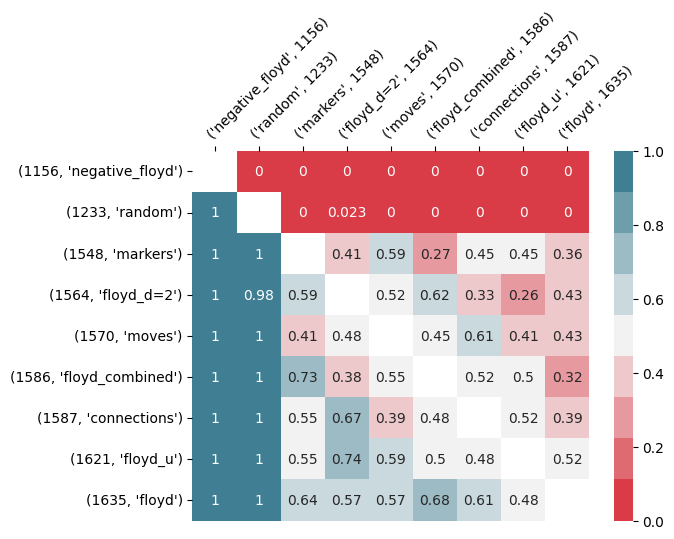

In [30]:
draws1 += np.eye(draws1.shape[0])
num_games = ( 1
        * wins1 
        + losses1 
        + wins2 
        + losses2
        + draws1 
        + draws2 
    )
ave_scores = ( 1
    * wins1
    + wins2 
    + 0.5 * draws1 
    + 0.5 * draws2
    # # - losses1
    # # - losses2
    ) /  (1 
        * num_games
    )
arr = num_games
arr = ave_scores
arr = arr - np.diag(np.diag(arr))
new_order = sorted(list(zip(list(range(len(index))), index)), key = lambda x: x[1][0])
new_index = [index[i[0]] for i in new_order]
new_arr = np.zeros(arr.shape)
for ni, ai in enumerate(new_order):
    new_arr[ni,:] = arr[ai[0],:]
for ai, ni in enumerate(new_order):
    arr[:,ai] = new_arr[:, ni[0]]
del new_arr
try:
    del df
except:
    pass
df = pd.DataFrame(data = arr, index = new_index, columns = new_index)
ax = sns.heatmap(df,annot=True, #annot_kws={'rotation': 60},
# vmax=1, 
# vmin=0,
mask = np.eye(arr.shape[0]),
cmap = [(0.2519971417644415, 0.4987337088076726, 0.5751602783606602),
 (0.43156001218774975, 0.6160490836499025, 0.6735874169971766),
 (0.611122882611058, 0.7333644584921324, 0.7720145556336929),
 (0.7906857530343663, 0.8506798333343624, 0.8704416942702093),
 (0.95, 0.95, 0.95),
 (0.9282549678814984, 0.7863704363662967, 0.7963965173228867),
 (0.9022582584936525, 0.6005186021022944, 0.622400049291663),
 (0.8762615491058064, 0.4146667678382919, 0.44840358126043944),
 (0.8510408608937171, 0.23436274952246883, 0.2796010376480583)][::-1], #kwargs={title: "average score of row versus column"}
)
ax.set_xticks([i+0.5 for i in range(len(new_index))],labels=[str((s[1], s[0])) for s in new_index],rotation=45, ha="left",
         rotation_mode="anchor"
         )

ax.xaxis.set_ticks_position('top')
print("Average score for row against column (bootstrapped elos instead of performance elo)")

In [16]:
# arr2 = ave_scores
df2 = df.sum(axis=1)
# sns.heatmap(df2)
df2.head(10)

(1156, negative_floyd)    0.000000
(1233, random)            1.022727
(1548, markers)           4.545455
(1564, floyd_d=2)         4.740942
(1570, moves)             4.794466
(1585, connections)       4.967062
(1586, floyd_combined)    4.987648
(1621, floyd_u)           5.375494
(1637, floyd)             5.566206
dtype: float64

In [9]:
sns.choose_diverging_palette()

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

[(0.2519971417644415, 0.4987337088076726, 0.5751602783606602),
 (0.43156001218774975, 0.6160490836499025, 0.6735874169971766),
 (0.611122882611058, 0.7333644584921324, 0.7720145556336929),
 (0.7906857530343663, 0.8506798333343624, 0.8704416942702093),
 (0.95, 0.95, 0.95),
 (0.9282549678814984, 0.7863704363662967, 0.7963965173228867),
 (0.9022582584936525, 0.6005186021022944, 0.622400049291663),
 (0.8762615491058064, 0.4146667678382919, 0.44840358126043944),
 (0.8510408608937171, 0.23436274952246883, 0.2796010376480583)]

In [10]:
games =  (wins1 
        + losses1 
        + wins2 
        + losses2
        + draws1 
        + draws2)
print(games)

[[ 1. 14. 14. 13. 14. 14. 13. 14. 13.]
 [14.  1. 14. 13. 13. 13. 13. 13. 13.]
 [14. 14.  1. 13. 13. 13. 13. 14. 13.]
 [13. 13. 13.  1. 13. 13. 14. 13. 13.]
 [14. 13. 13. 13.  1. 13. 13. 13. 13.]
 [14. 13. 13. 13. 13.  1. 13. 14. 13.]
 [13. 13. 13. 14. 13. 13.  1. 13. 13.]
 [14. 13. 14. 13. 13. 14. 13.  1. 13.]
 [13. 13. 13. 13. 13. 13. 13. 13.  3.]]


In [11]:
for i in indices:
    for j in indices:
        if i < j and games[i,j] == 13:
            print(f"python run_yinsh_games_between_two_bots.py 1 --bot1 {ind_to_bot[i]} --bot2 {ind_to_bot[j]}")

python run_yinsh_games_between_two_bots.py 1 --bot1 random --bot2 connections
python run_yinsh_games_between_two_bots.py 1 --bot1 random --bot2 negative_floyd
python run_yinsh_games_between_two_bots.py 1 --bot1 floyd --bot2 random
python run_yinsh_games_between_two_bots.py 1 --bot1 floyd --bot2 floyd_u
python run_yinsh_games_between_two_bots.py 1 --bot1 floyd --bot2 connections
python run_yinsh_games_between_two_bots.py 1 --bot1 floyd --bot2 markers
python run_yinsh_games_between_two_bots.py 1 --bot1 floyd --bot2 negative_floyd
python run_yinsh_games_between_two_bots.py 1 --bot1 floyd_combined --bot2 floyd_u
python run_yinsh_games_between_two_bots.py 1 --bot1 floyd_combined --bot2 connections
python run_yinsh_games_between_two_bots.py 1 --bot1 floyd_combined --bot2 negative_floyd
python run_yinsh_games_between_two_bots.py 1 --bot1 floyd_u --bot2 random
python run_yinsh_games_between_two_bots.py 1 --bot1 floyd_u --bot2 markers
python run_yinsh_games_between_two_bots.py 1 --bot1 floyd_u 